<a href="https://colab.research.google.com/github/SaifuliAnna/DataScience_HW6/blob/main/Hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1

В этом задании вам потребуется скачать вот [этот](https://www.kaggle.com/account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fsootersaalu%2Famazon-top-50-bestselling-books-2009-2019%3Fresource%3Ddownload) датасет . Мы с вами уже работали с ним когда изучали pandas. Это все так же Топ-50 самых продаваемых книг на Amazon в период с 2009 по 2019 годы. Требуется выполнить следующее:

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 13.6 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=925f5bdd1e5d911899bb580d922f626ab51e92d62ce352a03b172c83050729fa
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

from pyspark.sql.types import StructType, StructField, IntegerType, StringType
from pyspark.sql.functions import col

# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pyspark.sql.functions import udf

### 1.Создать спарк сессию.

In [ ]:
spark_session = SparkSession.builder.getOrCreate()

### 2.Прочитать датасет в датафрейм.

In [ ]:
# прочит для ознакомления
# spark_session.read.csv('bestsellers with categories.csv', header=True).show()

In [ ]:
books_df_start = spark_session.read.option("header", "true").option("inferSchema", 
          "true").csv("bestsellers with categories.csv")
books_df_start.show()          

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User Rating|Reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
|A Dance with Drag...| George R. R. Martin|        4.4|  12643|   11|2011|    Fiction|
|A Game of Thrones...| George R. R. Martin|        4.7|  19735|   30|2014|    Fiction|
|A Gentleman in Mo...|         Amor Towles|        4.7|  19699|   15|2017|    Fiction|
|A Higher Loyalty:...|         James Comey|

In [ ]:
# переименовать колонку что бы небыло пробелов
books_df = books_df_start.withColumnRenamed('User Rating', 'User_Rating')
books_df.show()

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User_Rating|Reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
|A Dance with Drag...| George R. R. Martin|        4.4|  12643|   11|2011|    Fiction|
|A Game of Thrones...| George R. R. Martin|        4.7|  19735|   30|2014|    Fiction|
|A Gentleman in Mo...|         Amor Towles|        4.7|  19699|   15|2017|    Fiction|
|A Higher Loyalty:...|         James Comey|

In [ ]:
# Определяем типы колонок
books_df.printSchema

<bound method DataFrame.printSchema of DataFrame[Name: string, Author: string, User_Rating: double, Reviews: int, Price: int, Year: int, Genre: string]>

### 3.Используя только RDD вычислить среднюю цену всех книг, у которых рейтинг выше 4.7

In [ ]:
# books_df.filter((col("User Rating") > 4.7)).show() 

#1. books_df.agg({"Price": "avg"}).show()
#2. books_df.groupBy().avg("Price").show()

In [ ]:
# books_df.filter(col("User_Rating") > 4.7).select(col('Price').alias('Cредняя цена')).agg({'Cредняя цена': "avg"}).show()

In [ ]:
books_df.filter(col("User_Rating") > 4.7).agg({"Price": "avg"}).show()

+-----------------+
|       avg(Price)|
+-----------------+
|10.69832402234637|
+-----------------+



### 4.Построить гистограмму распределения рецензий (столбец Reviews).

In [ ]:
books_df_pd = books_df.toPandas()

Определенное количество Авторов
# other sp



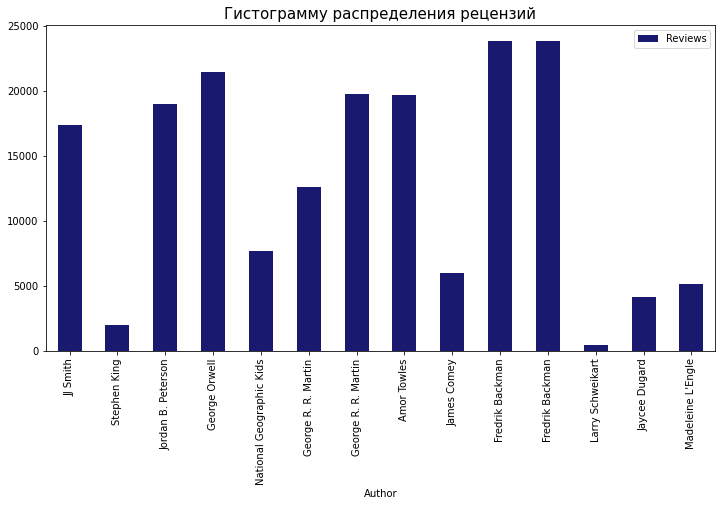

In [ ]:
any_books = books_df.select(['Author', 'Reviews']).toPandas()
any_books = any_books[:14]
# an_b
any_books[['Reviews']] = any_books[['Reviews']].astype(float)
any_books.plot.bar(x='Author', y='Reviews',color='midnightblue', figsize=(12, 6))
plt.title('Гистограмму распределения рецензий', fontsize=15)
plt.show();

## sp Name

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


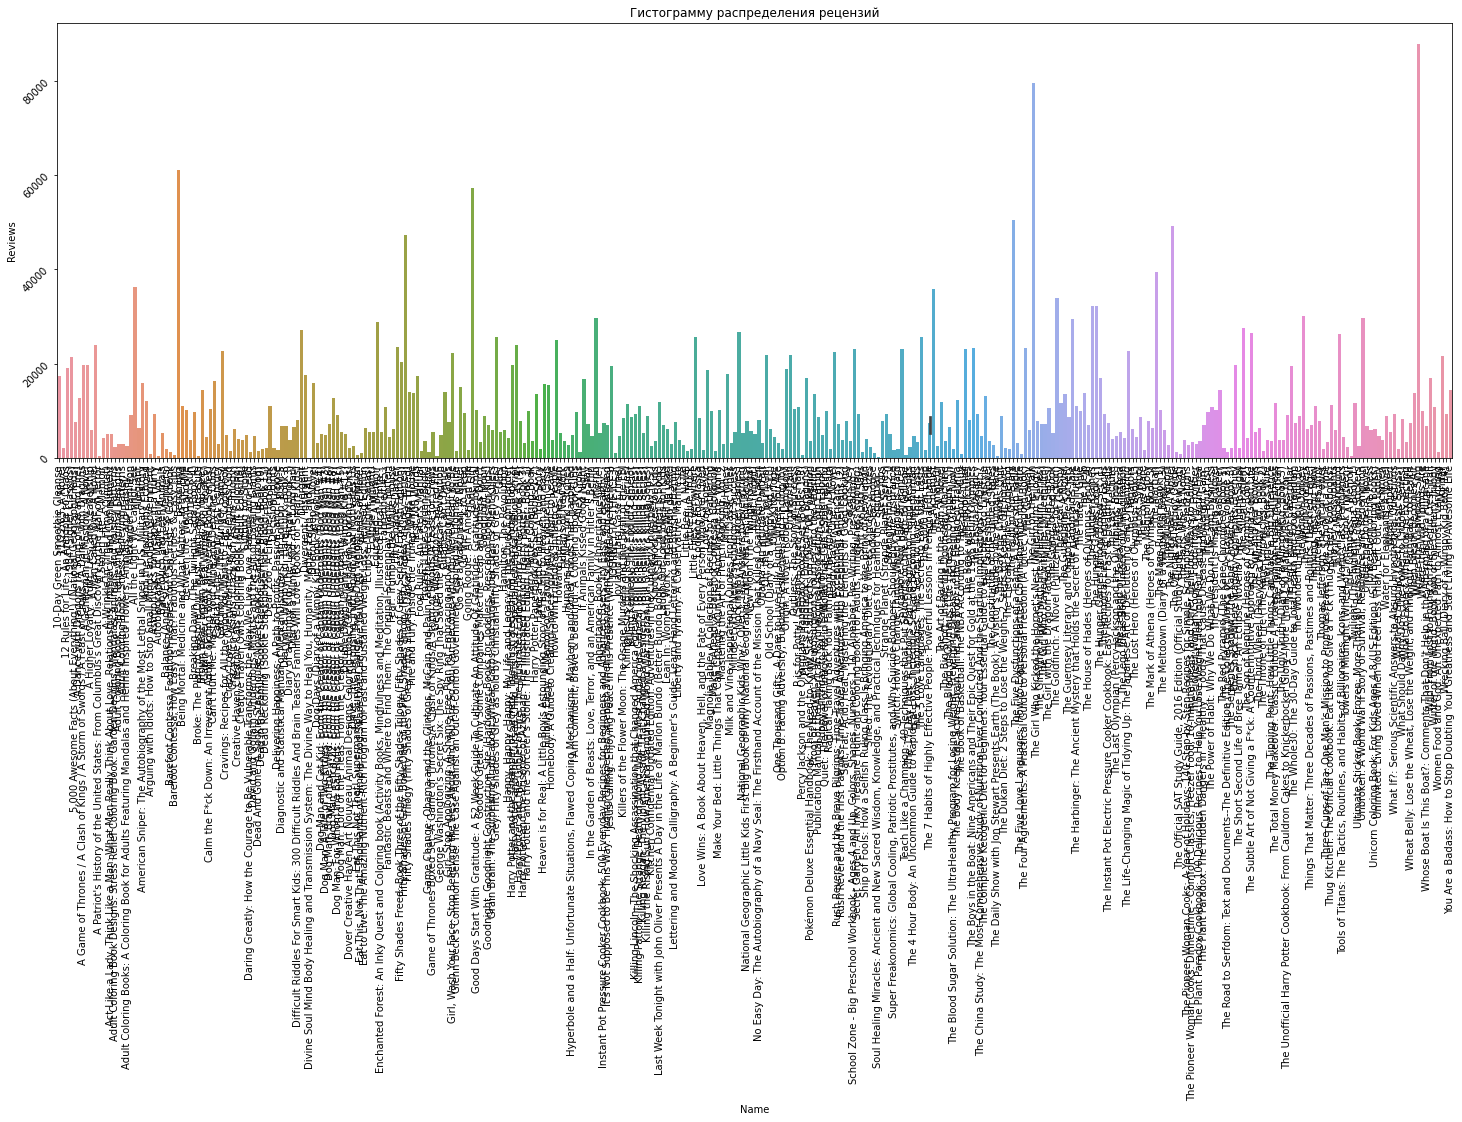

In [ ]:
fig, ax = plt.subplots(figsize=(25, 8))
ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='y', rotation=45)

plt.title('Гистограмму распределения рецензий')
plt.xlabel('Name')

sns.barplot(data=books_df_pd, x='Name', y='Reviews')

plt.show();

## sp Author

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0, flags=flags)


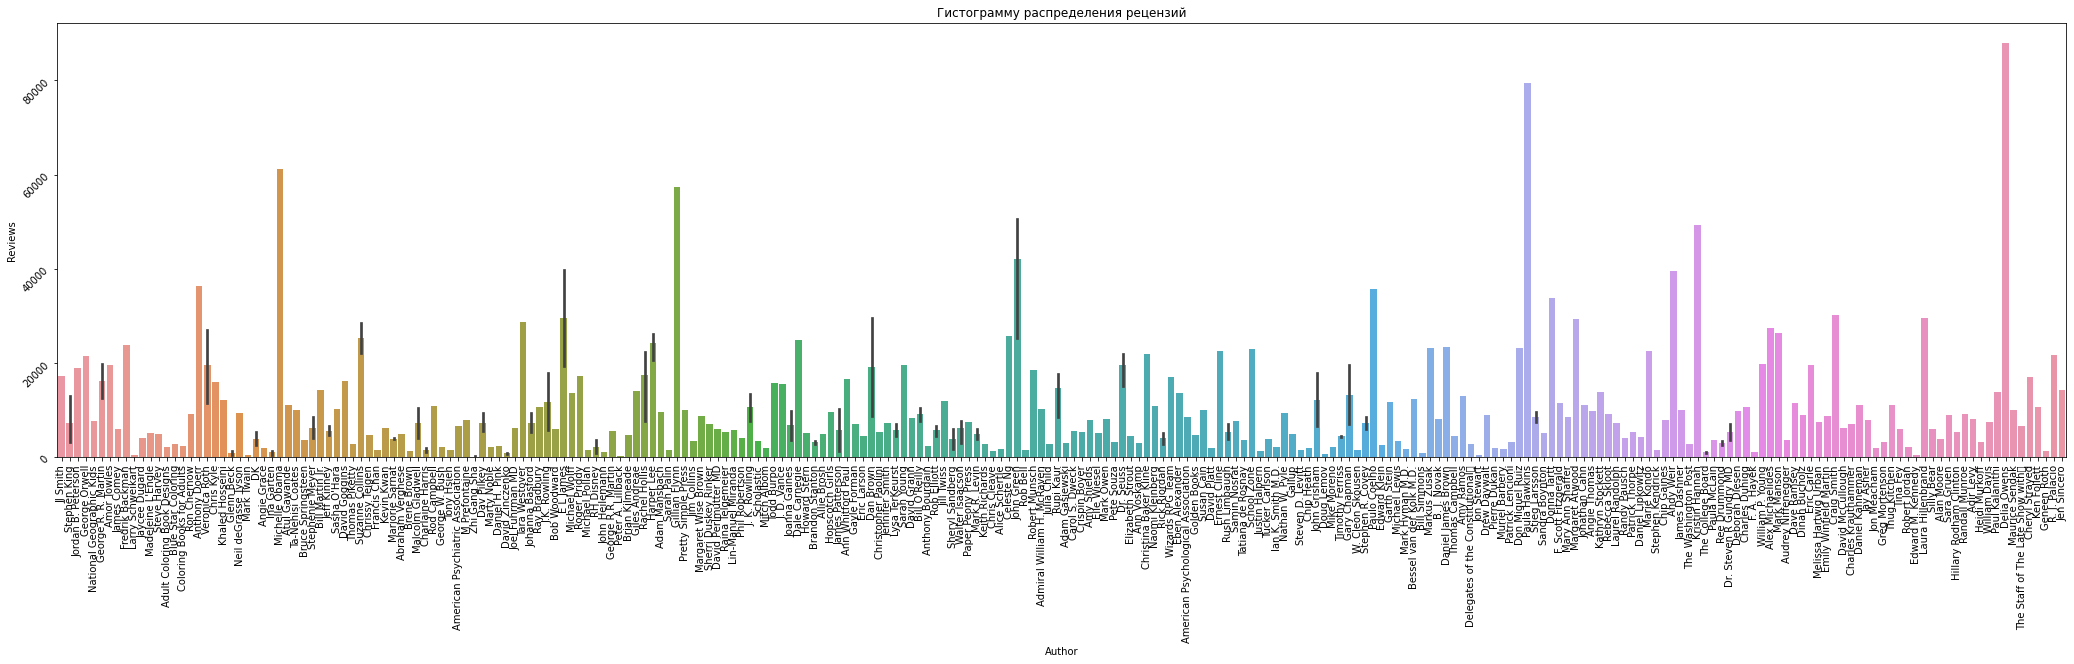

In [ ]:
fig, ax = plt.subplots(figsize=(36, 8))
ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='y', rotation=45)

plt.title('Гистограмму распределения рецензий')
plt.xlabel('Author')

sns.barplot(data=books_df_pd, x='Author', y='Reviews')

plt.show();

## 1. sp

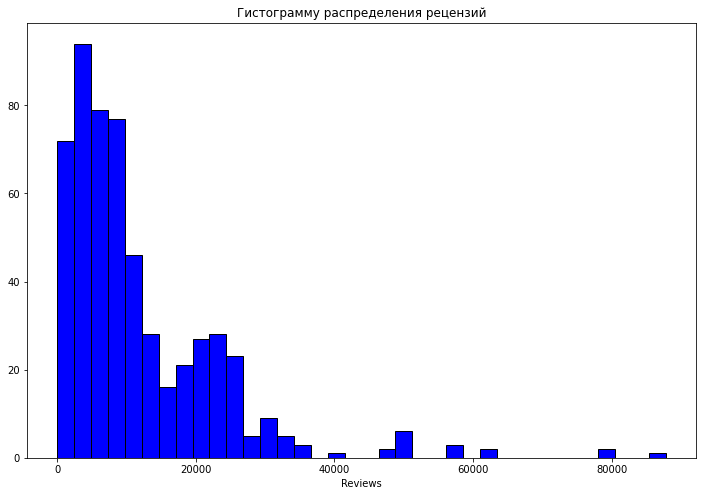

In [ ]:
# Import the libraries
# import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

# matplotlib histogram
plt.hist(books_df_pd['Reviews'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Гистограмму распределения рецензий')
plt.xlabel('Reviews')
plt.show();

### 2. sp

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


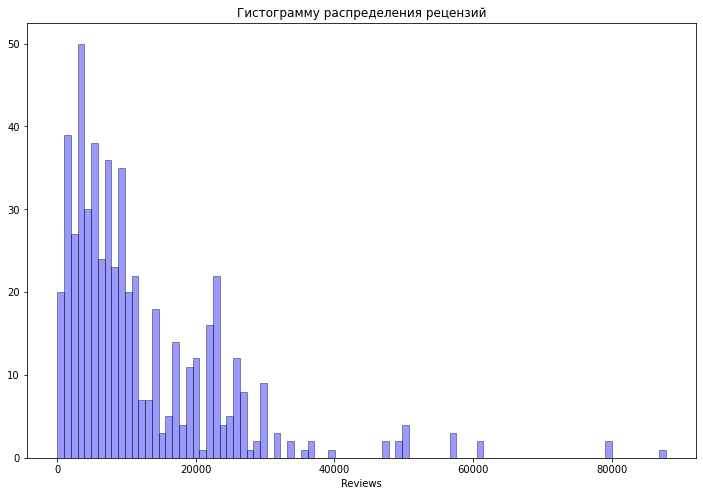

In [ ]:
# Import the libraries
# import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 8))

# Add labels
plt.title('Гистограмму распределения рецензий')
plt.xlabel('Reviews')

# seaborn histogram
sns.distplot(books_df_pd['Reviews'], hist=True, kde=False, 
             bins=int(90), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.show();

### 5.Построить матрицу корреляции для столбцов "User Rating", "Reviews" и "Price".



In [ ]:
# кореляция Пирсона с 2 арг
# books_df.corr("Price", "Reviews")
# books_df.corr("User_Rating", "Reviews")
# books_df.corr("User_Rating", "Price")

In [ ]:
corr_df = books_df_pd[["User_Rating", "Reviews", "Price"]]
corr_df.corr()

,User_Rating,Reviews,Price
User_Rating,1.000000,-0.001729,-0.133086
Reviews,-0.001729,1.000000,-0.109182
Price,-0.133086,-0.109182,1.000000


In [ ]:
# from pyspark.sql.functions import udf

# @udf('float')
# def take_float(integer: int) -> float:
#     return float(int(integer))

In [ ]:
# books_df.select(take_float(books_df.Reviews).alias("Reviews")).show()
# books_df.select(take_float(books_df.Price).alias("Price")).show()

### 6.Используя библиотеку seaborn построить парные графики (pairplots) столбцов "User Rating", "Reviews" и "Price".

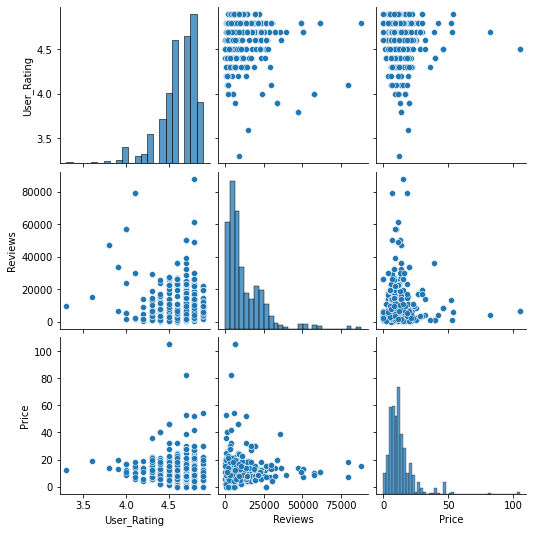

In [ ]:
#create pairs plot for all numeric variables
sns.pairplot(corr_df);

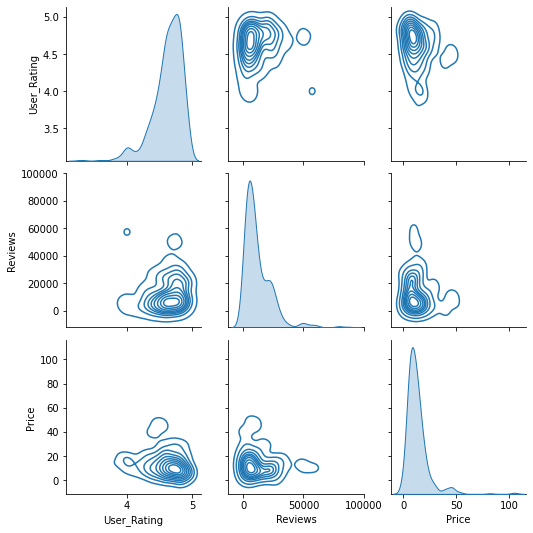

In [ ]:
sns.pairplot(corr_df, kind="kde");

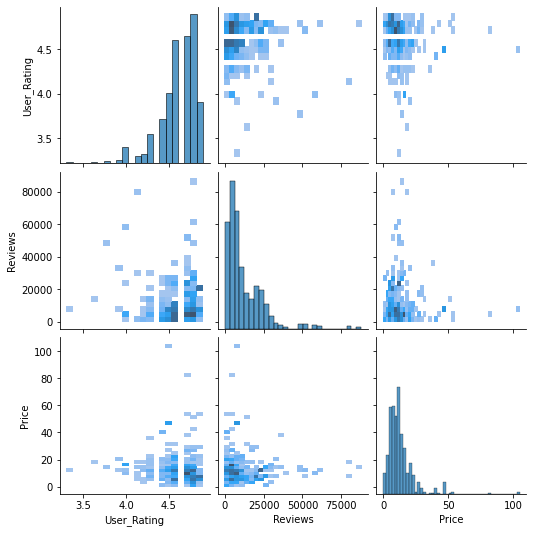

In [ ]:
sns.pairplot(corr_df, kind="hist");

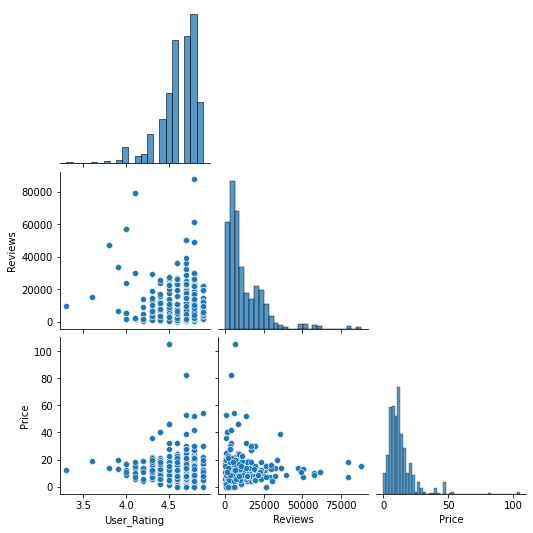

In [ ]:
sns.pairplot(corr_df, corner=True);

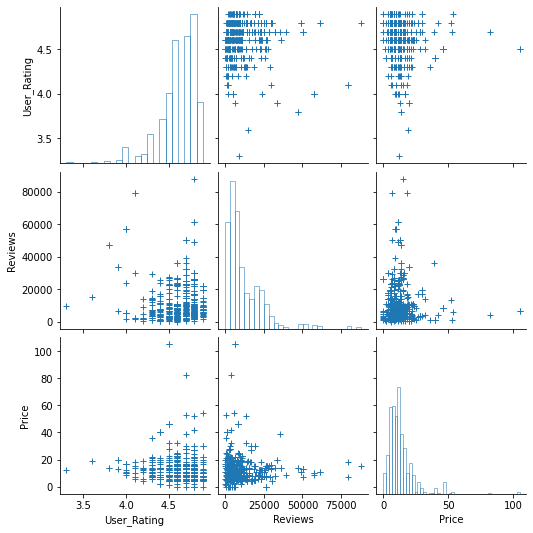

In [ ]:
sns.pairplot(
    corr_df,
    plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False),
);

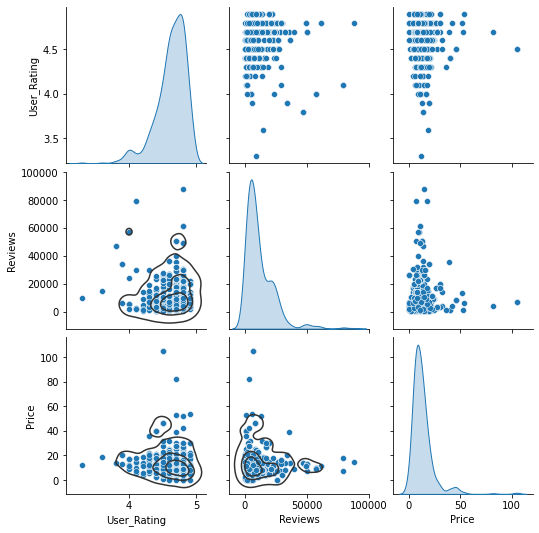

In [ ]:
g = sns.pairplot(corr_df, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2");

# Задание 2

При выполнении этого задания разрешается использовать только Spark SQL. Для датасета из предыдущего задания выполните следующее:

In [ ]:
# создать представление для датафрейма
books_df.createOrReplaceTempView("Books")

### 1.Найдите автора с самым высоким рейтингом.

In [ ]:
spark_session.sql("SELECT MAX(User_Rating) FROM Books").show()

+----------------+
|max(User_Rating)|
+----------------+
|             4.9|
+----------------+



In [ ]:
# spark_session.sql("SELECT DISTINCT Author FROM Books WHERE User_Rating=4.9").show()

In [ ]:
spark_session.sql("SELECT DISTINCT Author, User_Rating FROM Books WHERE User_Rating=4.9").show()

+--------------------+-----------+
|              Author|User_Rating|
+--------------------+-----------+
|Emily Winfield Ma...|        4.9|
|     Bill Martin Jr.|        4.9|
|          Eric Carle|        4.9|
|          Pete Souza|        4.9|
|      Nathan W. Pyle|        4.9|
|         Jeff Kinney|        4.9|
|     Brandon Stanton|        4.9|
|        J.K. Rowling|        4.9|
|         Chip Gaines|        4.9|
|           Dr. Seuss|        4.9|
|      Alice Schertle|        4.9|
|       Rush Limbaugh|        4.9|
|          Dav Pilkey|        4.9|
|       J. K. Rowling|        4.9|
|      Patrick Thorpe|        4.9|
|       Mark R. Levin|        4.9|
|Sherri Duskey Rinker|        4.9|
|          Jill Twiss|        4.9|
|         Sarah Young|        4.9|
|  Lin-Manuel Miranda|        4.9|
+--------------------+-----------+



### 2.Найдите трех авторов с самым низким рейтингом.

In [ ]:
# spark_session.sql("SELECT MIN(User_Rating) FROM Books").show()

In [ ]:
# spark_session.sql("SELECT DISTINCT Author, User_Rating FROM Books ORDER BY User_Rating ASC").show()

## 1 sp

In [ ]:
spark_session.sql("SELECT DISTINCT Author, User_Rating FROM Books ORDER BY User_Rating ASC").show(3)

+------------+-----------+
|      Author|User_Rating|
+------------+-----------+
|J.K. Rowling|        3.3|
|  Harper Lee|        3.6|
|   E L James|        3.8|
+------------+-----------+
only showing top 3 rows



## 2 sp

In [ ]:
spark_session.sql("SELECT DISTINCT Author, User_Rating FROM Books ORDER BY User_Rating ASC LIMIT 3").show()

+------------+-----------+
|      Author|User_Rating|
+------------+-----------+
|J.K. Rowling|        3.3|
|  Harper Lee|        3.6|
|   E L James|        3.8|
+------------+-----------+



### 3.Определите какой автор получил наибольшее количество рецензий.

In [ ]:
spark_session.sql("SELECT MAX(Reviews) FROM Books").show()

+------------+
|max(Reviews)|
+------------+
|       87841|
+------------+



In [ ]:
spark_session.sql("SELECT DISTINCT Author, Reviews FROM Books WHERE Reviews=87841").show()

+-----------+-------+
|     Author|Reviews|
+-----------+-------+
|Delia Owens|  87841|
+-----------+-------+



### 4.Определите какой автор написал наибольшее количество книг за весь доступный в данных период.

In [ ]:
# spark_session.sql("SELECT Author, Name FROM Books ").show()

In [ ]:
# spark_session.sql("SELECT COUNT(Name), Author FROM Books GROUP BY Author").show()

In [ ]:
spark_session.sql("SELECT COUNT(Name), Author FROM Books GROUP BY Author ORDER BY COUNT(Name) DESC").show()

+-----------+--------------------+
|count(Name)|              Author|
+-----------+--------------------+
|         12|         Jeff Kinney|
|         11|     Suzanne Collins|
|         11|        Gary Chapman|
|         11|        Rick Riordan|
|         10|American Psycholo...|
|          9|              Gallup|
|          9|           Dr. Seuss|
|          8|         Rob Elliott|
|          7|          Eric Carle|
|          7|     Stephenie Meyer|
|          7|       Bill O'Reilly|
|          7|    Stephen R. Covey|
|          7|          Dav Pilkey|
|          6|         Sarah Young|
|          6|          Harper Lee|
|          6|     Don Miguel Ruiz|
|          6|   The College Board|
|          6|       Stieg Larsson|
|          6|        J.K. Rowling|
|          6|           E L James|
+-----------+--------------------+
only showing top 20 rows



## 1 sp

In [ ]:
spark_session.sql("SELECT COUNT(Name), Author FROM Books GROUP BY Author ORDER BY COUNT(Name) DESC LIMIT 1").show()

+-----------+-----------+
|count(Name)|     Author|
+-----------+-----------+
|         12|Jeff Kinney|
+-----------+-----------+



## 2 sp

In [ ]:
spark_session.sql("SELECT COUNT(Name), Author FROM Books GROUP BY Author ORDER BY COUNT(Name) DESC").show(1)

+-----------+-----------+
|count(Name)|     Author|
+-----------+-----------+
|         12|Jeff Kinney|
+-----------+-----------+
only showing top 1 row



In [ ]:
# проверка 
spark_session.sql("SELECT Name, Author FROM Books WHERE Author='Jeff Kinney'").show()

+--------------------+-----------+
|                Name|     Author|
+--------------------+-----------+
|Cabin Fever (Diar...|Jeff Kinney|
|Diary of a Wimpy ...|Jeff Kinney|
|Diary of a Wimpy ...|Jeff Kinney|
|Diary of a Wimpy ...|Jeff Kinney|
|Dog Days (Diary o...|Jeff Kinney|
|Double Down (Diar...|Jeff Kinney|
|Old School (Diary...|Jeff Kinney|
|         The Getaway|Jeff Kinney|
|The Meltdown (Dia...|Jeff Kinney|
|The Third Wheel (...|Jeff Kinney|
|The Ugly Truth (D...|Jeff Kinney|
|Wrecking Ball (Di...|Jeff Kinney|
+--------------------+-----------+



### 5.Определите какая книга жанра "Fiction" имеет самый маленький рейтинг.

In [ ]:
# Определяем типы колонок
# books_df.printSchema

In [ ]:
spark_session.sql("SELECT Name, Genre, User_Rating FROM Books WHERE Genre='Fiction' ORDER BY User_Rating ASC").show()

+--------------------+-------+-----------+
|                Name|  Genre|User_Rating|
+--------------------+-------+-----------+
|  The Casual Vacancy|Fiction|        3.3|
|Go Set a Watchman...|Fiction|        3.6|
|Fifty Shades of G...|Fiction|        3.8|
|Fifty Shades of G...|Fiction|        3.8|
|The Goldfinch: A ...|Fiction|        3.9|
|The Goldfinch: A ...|Fiction|        3.9|
|           Allegiant|Fiction|        3.9|
|The Elegance of t...|Fiction|        4.0|
|           Gone Girl|Fiction|        4.0|
|Harry Potter and ...|Fiction|        4.0|
|           Gone Girl|Fiction|        4.0|
|           Gone Girl|Fiction|        4.0|
| Little Bee: A Novel|Fiction|        4.1|
|The Girl on the T...|Fiction|        4.1|
|             Inferno|Fiction|        4.1|
|The Girl on the T...|Fiction|        4.1|
|     The Lost Symbol|Fiction|        4.2|
|Dead Reckoning (S...|Fiction|        4.2|
|    Olive Kitteridge|Fiction|        4.2|
|And the Mountains...|Fiction|        4.3|
+----------

In [ ]:
spark_session.sql("SELECT Name, Genre, User_Rating FROM Books WHERE Genre='Fiction' ORDER BY User_Rating ASC LIMIT 1").show()

+------------------+-------+-----------+
|              Name|  Genre|User_Rating|
+------------------+-------+-----------+
|The Casual Vacancy|Fiction|        3.3|
+------------------+-------+-----------+



### 6.Определите какая книга жанра "Non Fiction" имеет самый высокий рейтинг.

In [ ]:
spark_session.sql("SELECT DISTINCT Name, Genre, User_Rating FROM Books WHERE Genre='Non Fiction' ORDER BY User_Rating DESC").show()

+--------------------+-----------+-----------+
|                Name|      Genre|User_Rating|
+--------------------+-----------+-----------+
|Hamilton: The Rev...|Non Fiction|        4.9|
|Humans of New Yor...|Non Fiction|        4.9|
|  The Magnolia Story|Non Fiction|        4.9|
|Unfreedom of the ...|Non Fiction|        4.9|
|Jesus Calling: En...|Non Fiction|        4.9|
|Obama: An Intimat...|Non Fiction|        4.9|
|5,000 Awesome Fac...|Non Fiction|        4.8|
|The Boys in the B...|Non Fiction|        4.8|
|The Constitution ...|Non Fiction|        4.8|
|Creative Haven Ow...|Non Fiction|        4.8|
|When Breath Becom...|Non Fiction|        4.8|
|Happy, Happy, Hap...|Non Fiction|        4.8|
|                Guts|Non Fiction|        4.8|
|National Geograph...|Non Fiction|        4.8|
|Have a Little Fai...|Non Fiction|        4.8|
|Barefoot Contessa...|Non Fiction|        4.8|
|National Geograph...|Non Fiction|        4.8|
|Being Mortal: Med...|Non Fiction|        4.8|
|Unicorn Colo

In [ ]:
spark_session.sql("SELECT DISTINCT Name, Genre, User_Rating FROM Books WHERE Genre='Non Fiction' AND User_Rating=4.9").show()

+--------------------+-----------+-----------+
|                Name|      Genre|User_Rating|
+--------------------+-----------+-----------+
|Humans of New Yor...|Non Fiction|        4.9|
|Jesus Calling: En...|Non Fiction|        4.9|
|  The Magnolia Story|Non Fiction|        4.9|
|Unfreedom of the ...|Non Fiction|        4.9|
|Obama: An Intimat...|Non Fiction|        4.9|
|Hamilton: The Rev...|Non Fiction|        4.9|
+--------------------+-----------+-----------+



# Задание 3

Постройте гистограмму среднего количества рецензий по годам. В виде отдельной гистограммы визуализируйте количество книг жанра "Fiction" и "Non Fiction" за весь доступный период.

## 1.Постройте гистограмму среднего количества рецензий по годам

In [ ]:
mean_rev = books_df_pd.groupby(['Year'])[['Reviews']].agg(['mean'])
ind_mean_rev = mean_rev.reset_index()
ind_mean_rev

,Year,Reviews
,,mean
0,2009,4710.12
1,2010,5479.62
2,2011,8100.82
3,2012,13090.92
4,2013,13098.14
5,2014,15859.94
6,2015,14233.38
7,2016,14196.00
8,2017,12888.40


In [ ]:
y_rev = ind_mean_rev[('Reviews', 'mean')]
y_rev

0      4710.12
1      5479.62
2      8100.82
3     13090.92
4     13098.14
5     15859.94
6     14233.38
7     14196.00
8     12888.40
9     13930.42
10    15898.34
Name: (Reviews, mean), dtype: float64

In [ ]:
x_year = ind_mean_rev[('Year')]
x_year

0     2009
1     2010
2     2011
3     2012
4     2013
5     2014
6     2015
7     2016
8     2017
9     2018
10    2019
Name: Year, dtype: int64

## Matplotlib

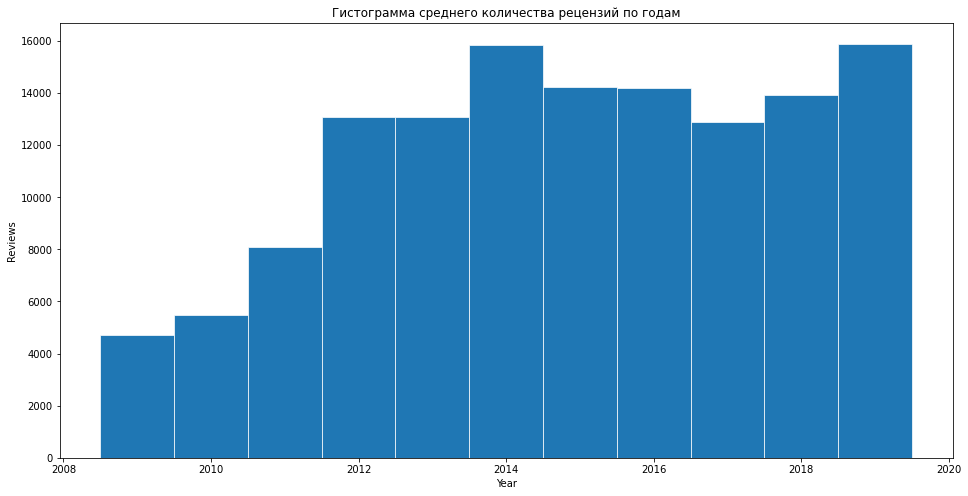

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.bar(x_year, y_rev, width=1, edgecolor="white", linewidth=0.7)

plt.title('Гистограмма среднего количества рецензий по годам')
plt.xlabel('Year')
plt.ylabel('Reviews')
plt.show();

## 2.В виде отдельной гистограммы визуализируйте количество книг жанра "Fiction" и "Non Fiction" за весь доступный период.

In [ ]:
df_genre = books_df_pd.groupby(['Genre'])[['Year']].agg(['count']).reset_index()
df_genre

,Genre,Year
,,count
0,Fiction,240
1,Non Fiction,310


In [ ]:
x_genre = df_genre[('Genre')]
x_genre

0        Fiction
1    Non Fiction
Name: Genre, dtype: object

In [ ]:
fiction = df_genre[('Year', 'count')][0]
non_fiction = df_genre[('Year', 'count')][1]
fiction, non_fiction

(240, 310)

In [ ]:
fict_count = df_genre[('Year', 'count')]
fict_count

0    240
1    310
Name: (Year, count), dtype: int64

## 1 sp

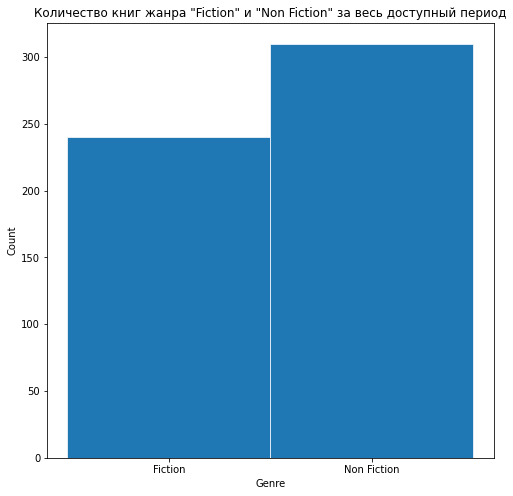

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.set_theme(style="whitegrid")

ax.bar(x_genre, fict_count, width=1, edgecolor="white", linewidth=0.7)
plt.title('Количество книг жанра "Fiction" и "Non Fiction" за весь доступный период')
plt.xlabel('Genre')
plt.ylabel('Count')

plt.show();

## 2 sp

## seaborn.barplot

In [ ]:
# fig, ax = plt.subplots(figsize=(8, 8))
# sns.set_theme(style="whitegrid")

# sns.barplot(data=df_genre, x=x_genre, y=fict_count)

# plt.title('Количество книг жанра "Fiction" и "Non Fiction" за весь доступный период')
# plt.xlabel('Genre')
# plt.ylabel('Count');

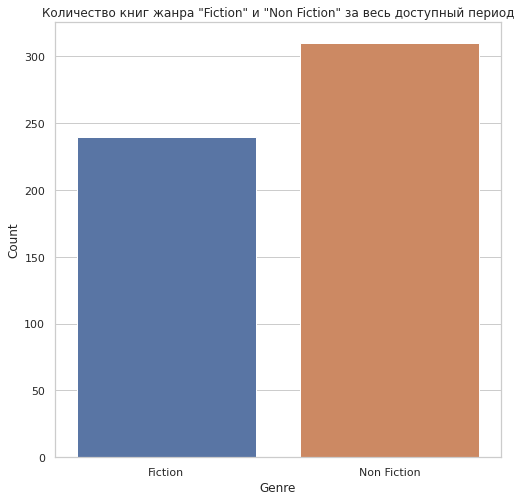

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.set_theme(style="whitegrid")

sns.barplot(data=x_genre, x=x_genre, y=fict_count)

plt.title('Количество книг жанра "Fiction" и "Non Fiction" за весь доступный период')
plt.xlabel('Genre')
plt.ylabel('Count');

## 2 experiment

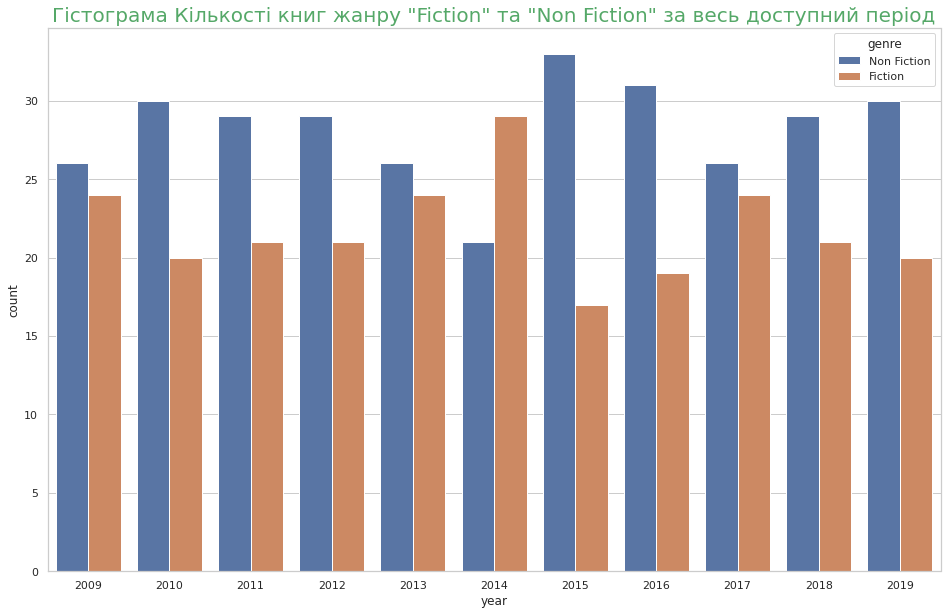

In [76]:
df6 = books_df.groupby(["year", "genre"]).count().toPandas()

plt.rcParams["figure.figsize"] = (16, 10)
sns.barplot(x="year", y="count", hue="genre", data=df6)
plt.title('Гістограма Кількості книг жанру "Fiction" та "Non Fiction" за весь доступний період', fontsize=20, color='g')
plt.show();

## 3 experiment

In [ ]:
# fig, ax = plt.subplots(figsize=(8, 8))
# sns.set_theme(style="whitegrid")

# sns.histplot(data=df_genre, x=fict_count, y=x_genre, hue=x_genre, multiple="dodge")

# plt.title('Количество книг жанра "Fiction" и "Non Fiction" за весь доступный период')
# plt.ylabel('Genre')
# plt.xlabel('Count');

## 4 experiment

In [ ]:
# усредненный график  между двумя ....
# fig, ax = plt.subplots(figsize=(8, 8))
# sns.set_theme(style="whitegrid")

# sns.barplot(data=df_genre, y=fict_count)

# plt.title('Количество книг жанра "Fiction" и "Non Fiction" за весь доступный период')
# plt.xlabel('Genre')
# plt.ylabel('Count');

In [ ]:
# books_df_pd[books_df_pd[['Genre']]=='Fiction'].agg(['count'])

# Задание 4 (по желанию)

In [ ]:
books_df.show()

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User_Rating|Reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
|A Dance with Drag...| George R. R. Martin|        4.4|  12643|   11|2011|    Fiction|
|A Game of Thrones...| George R. R. Martin|        4.7|  19735|   30|2014|    Fiction|
|A Gentleman in Mo...|         Amor Towles|        4.7|  19699|   15|2017|    Fiction|
|A Higher Loyalty:...|         James Comey|

In [ ]:
books_df.show(3)

+--------------------+------------------+-----------+-------+-----+----+-----------+
|                Name|            Author|User_Rating|Reviews|Price|Year|      Genre|
+--------------------+------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|          JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|      Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
+--------------------+------------------+-----------+-------+-----+----+-----------+
only showing top 3 rows



In [ ]:
books_df.describe().show()

+-------+--------------------+----------------+-------------------+------------------+------------------+------------------+-----------+
|summary|                Name|          Author|        User_Rating|           Reviews|             Price|              Year|      Genre|
+-------+--------------------+----------------+-------------------+------------------+------------------+------------------+-----------+
|  count|                 550|             550|                550|               550|               550|               550|        550|
|   mean|                null|            null|  4.618363636363641|11953.281818181818|              13.1|            2014.0|       null|
| stddev|                null|            null|0.22698036502519656|11731.132017431892|10.842261978422364|3.1651563841692782|       null|
|    min|"The Plant Parado...|Abraham Verghese|                3.3|                37|                 0|              2009|    Fiction|
|    max|You Are a Badass:...|    Zhi Gan

In [ ]:
books_df_cop = books_df['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
books_df_cop.show()

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                name|              author|user_rating|reviews|price|year|      genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
|A Dance with Drag...| George R. R. Martin|        4.4|  12643|   11|2011|    Fiction|
|A Game of Thrones...| George R. R. Martin|        4.7|  19735|   30|2014|    Fiction|
|A Gentleman in Mo...|         Amor Towles|        4.7|  19699|   15|2017|    Fiction|
|A Higher Loyalty:...|         James Comey|

Сортировка данных

In [ ]:
books_df_cop.orderBy('user_rating').show()

+--------------------+-------------+-----------+-------+-----+----+-----------+
|                name|       author|user_rating|reviews|price|year|      genre|
+--------------------+-------------+-----------+-------+-----+----+-----------+
|  The Casual Vacancy| J.K. Rowling|        3.3|   9372|   12|2012|    Fiction|
|Go Set a Watchman...|   Harper Lee|        3.6|  14982|   19|2015|    Fiction|
|Fifty Shades of G...|    E L James|        3.8|  47265|   14|2012|    Fiction|
|Fifty Shades of G...|    E L James|        3.8|  47265|   14|2013|    Fiction|
|The Goldfinch: A ...|  Donna Tartt|        3.9|  33844|   20|2013|    Fiction|
|The Goldfinch: A ...|  Donna Tartt|        3.9|  33844|   20|2014|    Fiction|
|           Allegiant|Veronica Roth|        3.9|   6310|   13|2013|    Fiction|
|           Gone Girl|Gillian Flynn|        4.0|  57271|   10|2012|    Fiction|
|           Gone Girl|Gillian Flynn|        4.0|  57271|   10|2013|    Fiction|
| StrengthsFinder 2.0|       Gallup|    

In [ ]:
ordered = books_df_cop.orderBy(['price', 'year'], ascending=[0, 1])
ordered.select(['price', 'year']).show(10)

+-----+----+
|price|year|
+-----+----+
|  105|2013|
|  105|2014|
|   82|2009|
|   54|2016|
|   53|2009|
|   52|2016|
|   46|2009|
|   46|2010|
|   46|2011|
|   46|2012|
+-----+----+
only showing top 10 rows



Группировка и агрегирование данных

In [ ]:
grouped = books_df_cop.groupBy(['author', 'year'])

Вывод максимальной цены продажи для каждого автора

---



In [ ]:
grouped.max('price').show(3)

+----------------+----+----------+
|          author|year|max(price)|
+----------------+----+----------+
|  Carol S. Dweck|2015|        10|
|    Samin Nosrat|2019|        20|
|Stephen R. Covey|2011|        24|
+----------------+----+----------+
only showing top 3 rows



Вывод средн цены продажи для каждого автора

In [ ]:
grouped.mean('price').show(3)

+----------------+----+----------+
|          author|year|avg(price)|
+----------------+----+----------+
|  Carol S. Dweck|2015|      10.0|
|    Samin Nosrat|2019|      20.0|
|Stephen R. Covey|2011|      24.0|
+----------------+----+----------+
only showing top 3 rows



Количество записей в каждой группе

In [ ]:
grouped.count().show(3)

+----------------+----+-----+
|          author|year|count|
+----------------+----+-----+
|  Carol S. Dweck|2015|    1|
|    Samin Nosrat|2019|    1|
|Stephen R. Covey|2011|    1|
+----------------+----+-----+
only showing top 3 rows



Фильтрация данных

In [ ]:
filtered = books_df_cop.filter("price > 80")
filtered.select('price').show()

+-----+
|price|
+-----+
|  105|
|  105|
|   82|
+-----+

